 # NetVLAD Step by Step으로 구현해보기. 

 ![framework](framework.png)   

 논문의 프로젝트 페이지는 다음과 같다.   
 https://www.di.ens.fr/willow/research/netvlad/   

우선 실험에 사용한 데이터셋을 알아보자. 
- Pittsburgh 데이터셋 (Pitts250k) : contains 250k database images  downloaded from Google Street View and 24k test queries  generated from Street View but taken at different times, years apart.  
  A. Torii, J. Sivic, T. Pajdla, and M. Okutomi. Visual place recognition with repetitive structures. In Proc. CVPR, 2013.

- Tokyo 24/7 : 76k database images and 315 query images taken using mobile phone cameras.
  A. Torii, R. Arandjelović, J. Sivic, M. Okutomi, and T. Pajdla. 24/7 place recognition by view synthesis. In Proc. CVPR, 2015

- TokyoTM : Tokyo 24/7 (=test) and TokyoTM train/val are all geographically disjoint. 이건 train/Validation을 위한 셋트를 위해 추가로 사용되었다. Google 스트리트뷰 파노라마사진들이다. 

우선 피츠버그 데이터셋을 다운받아보자.   
![download](pittsburg_download.png)

In [6]:
import kagglehub
# Download latest version
path_pittsburg = kagglehub.dataset_download("duongoku/pittsburgh250k")

print("Path to dataset files:", path_pittsburg)

Path to dataset files: /home/lairpeteryksong/.cache/kagglehub/datasets/duongoku/pittsburgh250k/versions/1


데이터셋 다운로드가 이상한것 같다. 왠만해선 오리지날로 받아서 쓰자.   
http://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/

![dataset_original](dataset_origin.png)

In [2]:
import os
from requests import get
import urllib
from urllib.parse import urlparse

#https://ctkim.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-urllib-%EB%AA%A8%EB%93%88#google_vignette
#https://developer0hye.tistory.com/648

url_list = []
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/000.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/001.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/002.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/003.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/004.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/005.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/006.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/007.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/008.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/009.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/010.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/groundtruth.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/md5sums.txt')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/netvlad_v100_datasets.tar.gz')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/pose.txt')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/queries_real.tar')
url_list.append('https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/readGt.m')

print(url_list)
print(urlparse(url_list[0]))
print(os.path.basename(url_list[0]))

download_dir = "./data/Pittsburgh250k/"
if not os.path.exists(download_dir):
    os.mkdir(download_dir)


for url in url_list:
    print(url)
    file_name = os.path.basename(url)
    full_path = os.path.join(download_dir,file_name)
    print(full_path)
    urllib.request.urlretrieve(url,full_path)




['https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/000.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/001.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/002.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/003.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/004.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/005.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/006.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/007.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/008.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/009.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/010.tar', 'https://data.ciirc.cvut.cz/public/projects/2015netVLAD/Pittsburgh250k/groundtruth.tar', 'https://data.ciirc

KeyboardInterrupt: 

In [ ]:

import tarfile

file_list = os.listdir(download_dir)
file_list_tar = [file for file in file_list if file.endswith(".tar")]

for files in file_list_tar:
    tar_folder = os.path.join(download_dir,files.split('.',1)[0])
    

    if not os.path.exists(tar_folder):
        os.mkdir(tar_folder)
    
    tar_path = os.path.join(download_dir,files)
    print(tar_path)
    print(tar_folder)

    with tarfile.open(tar_path) as tar:
        tar.extractall(path = tar_folder)
        tar.close()  



./data/Pittsburgh250k/010.tar
./data/Pittsburgh250k/010
./data/Pittsburgh250k/004.tar
./data/Pittsburgh250k/004
./data/Pittsburgh250k/008.tar
./data/Pittsburgh250k/008
./data/Pittsburgh250k/queries_real.tar
./data/Pittsburgh250k/queries_real
./data/Pittsburgh250k/000.tar
./data/Pittsburgh250k/000
./data/Pittsburgh250k/groundtruth.tar
./data/Pittsburgh250k/groundtruth
./data/Pittsburgh250k/007.tar
./data/Pittsburgh250k/007
./data/Pittsburgh250k/006.tar
./data/Pittsburgh250k/006
./data/Pittsburgh250k/002.tar
./data/Pittsburgh250k/002
./data/Pittsburgh250k/005.tar
./data/Pittsburgh250k/005
./data/Pittsburgh250k/001.tar
./data/Pittsburgh250k/001
./data/Pittsburgh250k/009.tar
./data/Pittsburgh250k/009
./data/Pittsburgh250k/003.tar
./data/Pittsburgh250k/003


## Model 다운로드

NetVLAD 에서는 Object인식을 위해 오픈된 네트워크 모델을 활용한다. 여기선 VGG-16이나 AlexNet을 사용하는데,  
이후 연구실 추천이나 다른 연구에서는 DinoV2 도 많이 활용하며, 단순히 Desciptor pooling 을 위해서는 다른 모델들도 활용하곤 한다.   
Huggingface를 이용하는 방법은 좀 더 나중에 구현해보고, 
지금은 timm 으로 받는 방법을 먼저 해본다. 

https://timm.fast.ai/create_model

In [4]:
import os
import torch

In [5]:
import timm
print(timm.list_models('*vgg16*'))

['vgg16', 'vgg16_bn']


In [20]:
#임의 임력 만들기 

x = torch.randn(8,3,256,256)

#모델 선언
model = timm.create_model('vgg16', pretrained=True,features_only=True,out_indices=(5,))

result = model(x)
print(model)
print(type(result), len(result))
print(result[0].shape)


FeatureListNet(
  (features_0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features_1): ReLU(inplace=True)
  (features_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features_3): ReLU(inplace=True)
  (features_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (features_5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features_6): ReLU(inplace=True)
  (features_7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features_8): ReLU(inplace=True)
  (features_9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (features_10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features_11): ReLU(inplace=True)
  (features_12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features_13): ReLU(inplace=True)
  (features_14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fe

(640, 480)
RGB


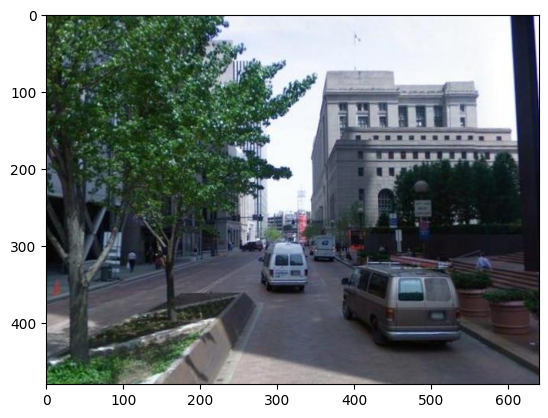

TypeError: conv2d() received an invalid combination of arguments - got (Image, Parameter, Parameter, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, tuple of ints padding = 0, tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)
 * (Tensor input, Tensor weight, Tensor bias = None, tuple of ints stride = 1, str padding = "valid", tuple of ints dilation = 1, int groups = 1)
      didn't match because some of the arguments have invalid types: (!Image!, !Parameter!, !Parameter!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, !int!)


In [ ]:
#import random
#참조 : https://wikidocs.net/232806

from PIL import Image
import matplotlib.pyplot as plt
test_image_path = './data/Pittsburgh250k/000/000/000000_pitch1_yaw1.jpg'

image = Image.open(test_image_path)
#img = image.resize((256,256))
print(image.size)
print(image.mode)
plt.imshow(image)
plt.show()


# 그냥 뚜드려 넣으면 될 줄알았나. 사용자정의 데이터셋 만들어보자. 



## 사용자 데이터셋 만들기

참고자료 https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

``` 
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

```

우선 label 이 필요한가 고민해볼 필요가 있다. 사실 label이 없지 않나??


In [35]:
import os
import pandas as pd
from torchvision.io import read_image

Own dataset을 만들기 위해, 원저자의 내용을 참조해보자. dbBase.m 파일에 기재되어있다. 

% To make your own dataset (see dbPitts.m for an easy example):
% 1. Inherit from dbBase
dbBase를 상속받는다라... 이건 데이터셋 클래스 만들면서 되는거니 생략하고. 

% 2. In the constructor, set a short identifier of the dataset in db.name
constructor에서 db.name에 짧은 id를 부여해야 하고. 

% 3. Save a matlab structure called dbStruct to <paths.dsetSpecDir>/<db.name>.mat, which contains:
matlab structure 형태로 dbStruct를 저장하라는데, 이건 어떻게 해결해야 하는걸까. 아예 다른 방법으로 풀어야 하나? 

%   - dbImageFns: cell array of database image file names relative to dataset root
dbImageFns 데이터셋의 파일이름들, 경로저장항목인것같고. 
%   - qImageFns: cell array of query image file names relative to dataset root
그러면 이건 쿼리용 이미지 상대경로이고.

%   - utmDb:  2x <number_of_database_images>, containing (x,y) UTM coordinates for each database image
각각의 db용 이미지에 UTM 을 넣어야 하고. 

%   - utmQ:  2x <number_of_query_images>, containing (x,y) UTM coordinates for each query image
이건 쿼리 이미지의 UTM을 넣어야 하네. 

%   - posDistThr: distance in meters which defines potential positives
Positive 이미지와의 거리를 기록해야 하고. 

%   - nonTrivPosDistSqThr: squared distance in meters which defines the potential positives used for training
Negative 이미지와의 거리도 기록해야 하네. 

그러면 데이터셋에 이미 Positive이미지와 Negative이미지를 다 넣어야 한다는 뜻이 된다. 


% 4. In the constructor, set db.dbPath and db.qPath specifying the root locations of database and query images, respectively. Presumably, like in dbPitts.m, you want to load these from a configuration file. The variables should be such that [db.dbPath, dbImageFns{i}] and [db.qPath, qImageFns{i}] form the full paths to database/query images.
생성자에서 train데이터의 경로와 test데이터 경로를 각각 설정해줘야 하고. 그걸 dbPiits.m에서 볼 수 있다고 한다. 

% 5. Finally: call db.dbLoad(); at the end of the constructor
dbLoad에서 생성자를 실행한다고 한다. 저기가 DataLoader구나. 

% 6. Optionally: you can override the methods for some more functionality, e.g. for Tokyo Time Machine we modify the fuction nontrivialPosQ which gets all potential positives for a query that are non-trivial (don't come from the same panorama). For Time Machine data, we also make sure that the nontrivial potential positives are taken at different times than the query panorama (for generalization, c.f. our NetVLAD paper). There was no need for this for the Pittsburgh dataset as the query and the database sets were taken at different times, but for TokyoTM the query set is constructed out of the database set. Furthermore, one can also supplu 'nnSearchPostprocess' which filters search results (used in testCore.m), e.g. it is done for Tokyo 24/7 to follow the standard test procedure for this dataset (i.e. perform very simple non-max suppression)
Tokyo 데이터셋 쓰는 방법이다. 



In [ ]:
#https://github.com/Nanne/pytorch-NetVlad/blob/master/pittsburgh.py#L69

class Pittsburgh250k(dataset):

    def __init__(self,image_dir,transform = None, target_transform=None):
        
        self.img_dir = image_dir
        self.transform = transform
        self.traget_transform = target_transform


    def __len__(self):

    def __getitem__(self,idx):

    

    

